In [22]:
from foobah.gcode import GCODE
from foobah.utils import preview_png
from foobah.methods import line_threshold

import PIL
import PIL.Image
import PIL.ImageFilter

from IPython.display import display

from random import uniform

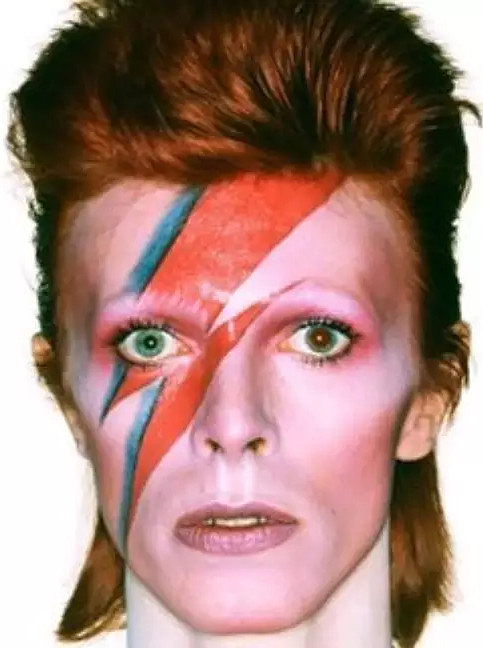

In [23]:
basename = "david_bowie"
scale = 1

image_name = "images/david-bowie.jpg"
image = PIL.Image.open(image_name)

image = image.resize((int(image.width / scale), int(image.height / scale)), PIL.Image.ANTIALIAS)

image = image.filter(PIL.ImageFilter.DETAIL)

image = image.convert("RGB")

width = image.width
height = image.height

display(image)

In [56]:
gcode = GCODE(basename, feedrate=2000)
gcode.move_to_starting_position()
gcode.draw_boundaries()
gcode.pen_up()

In [57]:
line_threshold(image=image, gcode=gcode, threshold=0.9, angle=0, step_size=2)
line_threshold(image=image, gcode=gcode, threshold=0.75, angle=45, step_size=3)
line_threshold(image=image, gcode=gcode, threshold=0.5, angle=90, step_size=3)
line_threshold(image=image, gcode=gcode, threshold=0.25, angle=135, step_size=4)

In [58]:
gcode.pen_up()
gcode.move_to_starting_position()
gcode.flush()

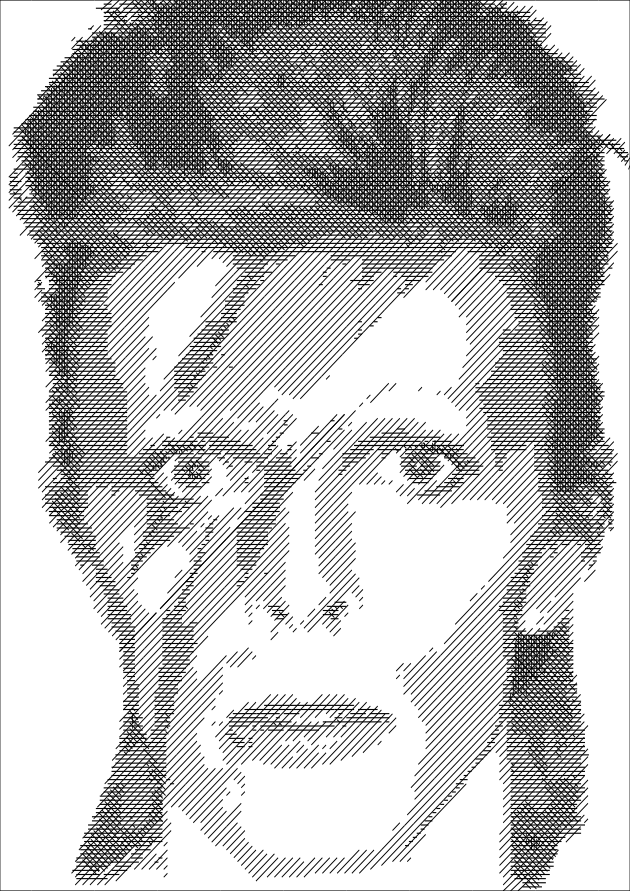

In [59]:
preview_png(basename, scale=3)